<a href="https://colab.research.google.com/github/angelaportillo/AI_IB/blob/main/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Processing Datasets in Python
### Hour: N1  Team members:
*2028256 Zapata Portillo Angela Marisa*

*2016872 Marian Roxana Martínez Serrato*

*2016052 Pablo Ezaú Zapata Cruz*

*2043428 David Aldebaran Cardona Padilla*

*2132042 Jennifer Morales Enciso*

### Part 1: Data Loading and Exploration

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/pabzpcz/AI/refs/heads/main/Act%202/diabetes.csv'
df = pd.read_csv(url)
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
zero_column = (df == 0).sum()

zero_table = {'Columna' : zero_column.index,
              'Numero de ceros': zero_column.values}

zero_df = pd.DataFrame(zero_table) # Cambiado df a zero_df

display(zero_df) # Cambiado df a zero_df para mostrar la tabla de ceros

,Columna,Numero de ceros
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,500


In [ ]:
print("\nFilas con valores nulos o ceros problemáticos:")
key_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in key_columns:
    zero_or_null = df[df[col].isin([0, np.nan])]
    if not zero_or_null.empty:
        print(f"\n--- {col} ---")
        display(zero_or_null.head())


Filas con valores nulos o ceros problemáticos:

--- Glucose ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1



--- BloodPressure ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1



--- SkinThickness ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0



--- Insulin ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0



--- BMI ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [ ]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Columnas numéricas identificadas:", numeric_cols)

df_clean = df.copy()

for col in numeric_cols:
    col_median = df_clean[df_clean[col] != 0][col].median()
    # Replace zeros with median
    df_clean[col] = df_clean[col].replace(0, col_median)

    print(f"Replaced zeros in {col} with median value: {col_median:.2f}")

Columnas numéricas identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Replaced zeros in Pregnancies with median value: 4.00
Replaced zeros in Glucose with median value: 117.00
Replaced zeros in BloodPressure with median value: 72.00
Replaced zeros in SkinThickness with median value: 29.00
Replaced zeros in Insulin with median value: 125.00
Replaced zeros in BMI with median value: 32.30
Replaced zeros in DiabetesPedigreeFunction with median value: 0.37
Replaced zeros in Age with median value: 29.00
Replaced zeros in Outcome with median value: 1.00


VERIFICACIÓN DE CEROS RESTANTES
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0

Total de ceros restantes: 0

ESTADÍSTICAS DESCRIPTIVAS


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.0
mean,4.42,121.66,72.39,29.11,140.67,32.46,0.47,33.24,1.0
std,2.98,30.44,12.10,8.79,86.38,6.88,0.33,11.76,0.0
min,1.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,1.0
25%,2.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,1.0
50%,4.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,1.0
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.0
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.0



DISTRIBUCIÓN DE VARIABLES (DataFrame Limpio)


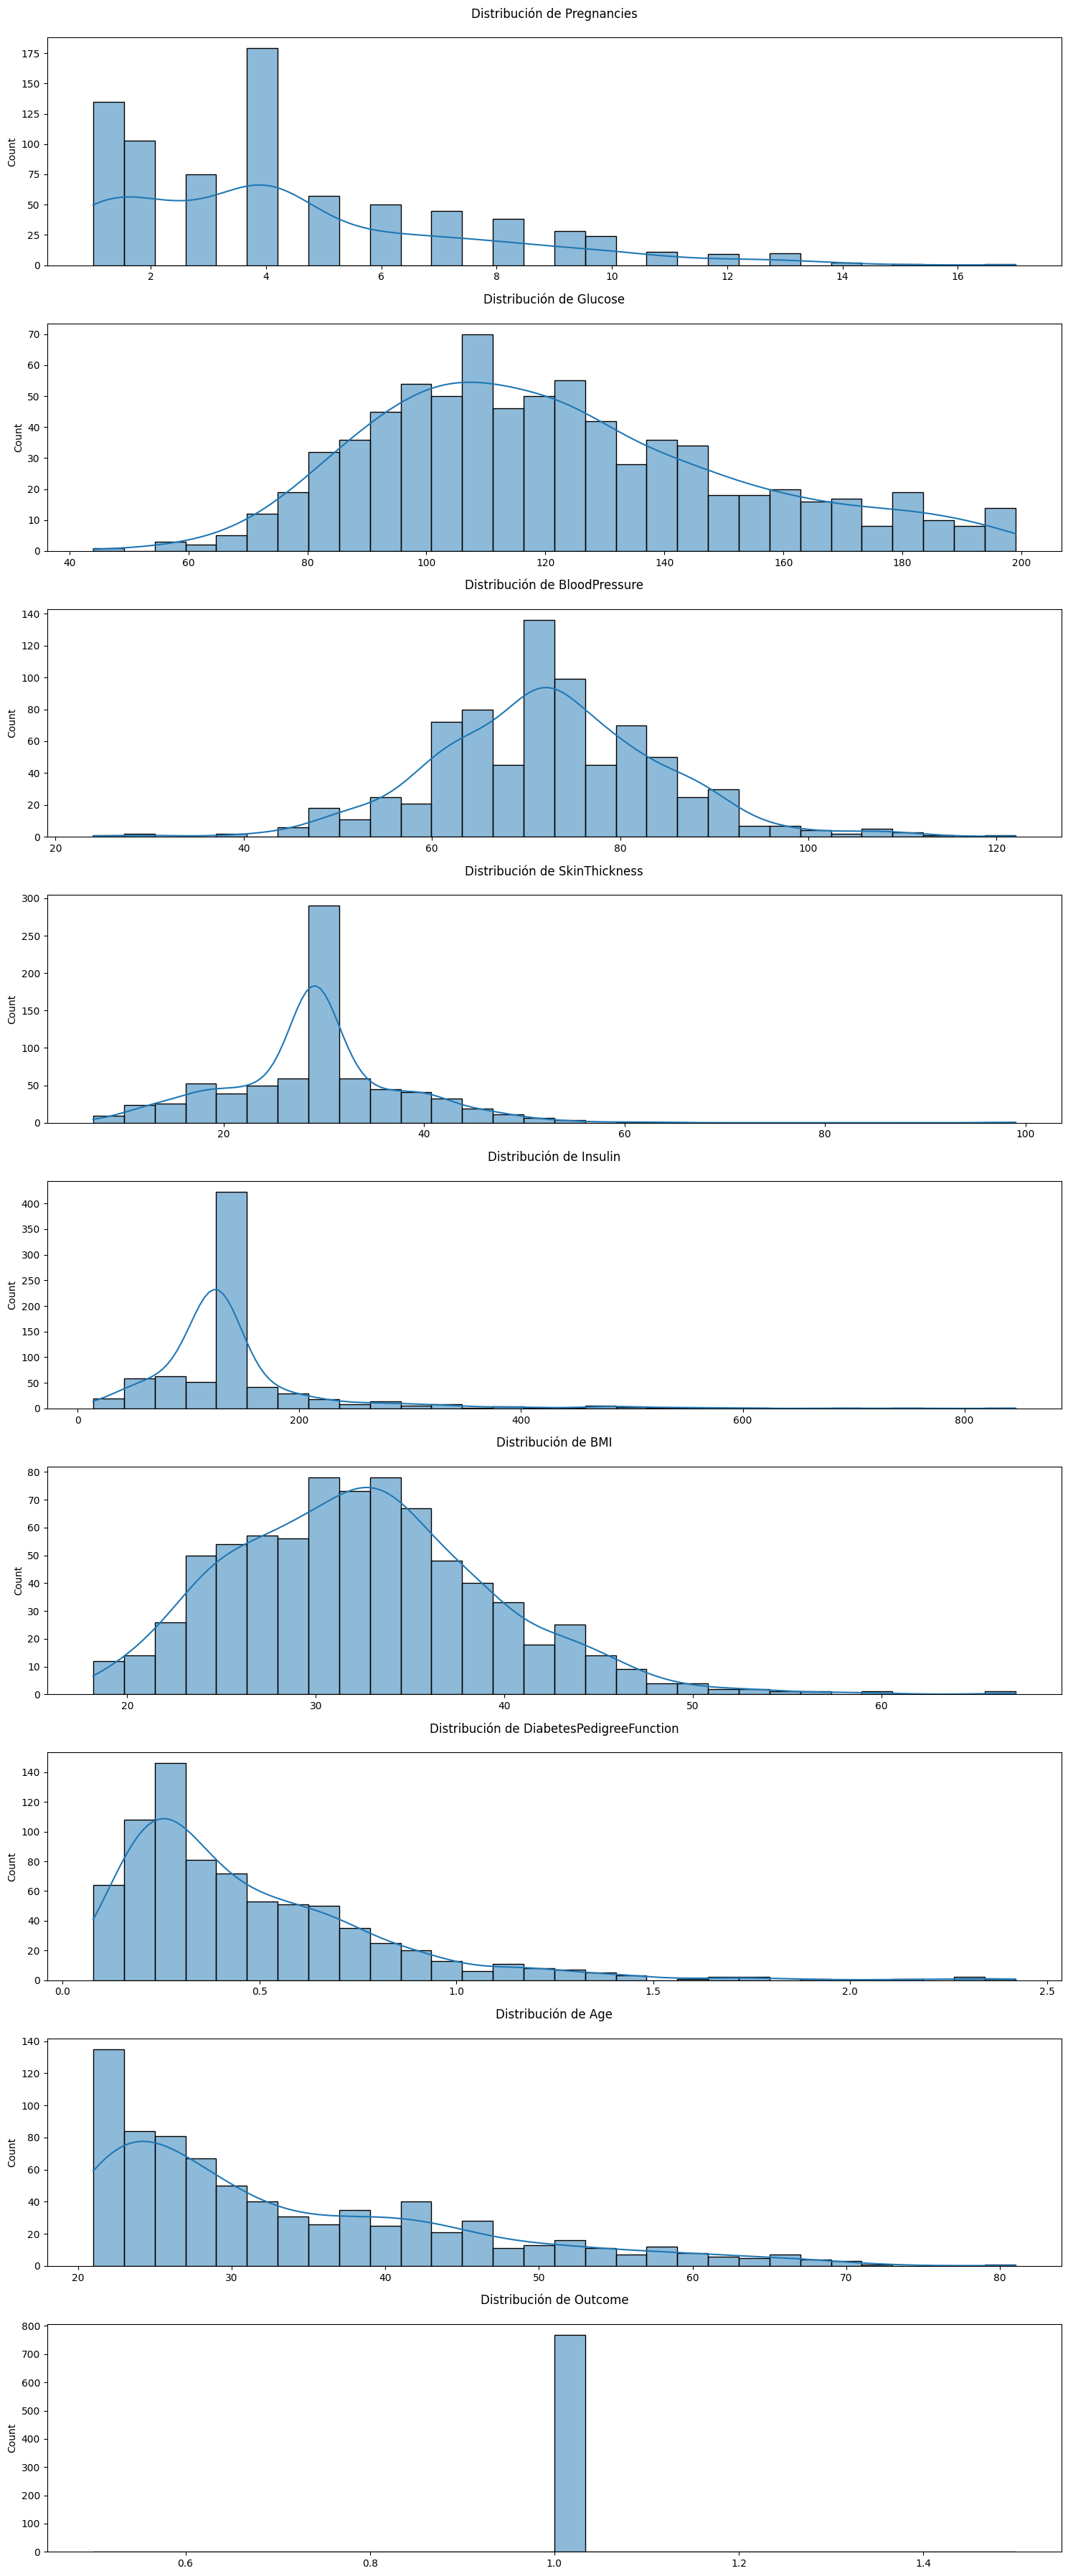

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols_clean = df_clean.select_dtypes(include=['int', 'float']).columns.tolist()

print("VERIFICACIÓN DE CEROS RESTANTES")
ceros_restantes = (df_clean[numeric_cols_clean] == 0).sum()
print(ceros_restantes.to_string(name="Ceros remanentes"))
print(f"\nTotal de ceros restantes: {ceros_restantes.sum()}")

print("\nESTADÍSTICAS DESCRIPTIVAS")
display(df_clean[numeric_cols_clean].describe().round(2))

print("\nDISTRIBUCIÓN DE VARIABLES (DataFrame Limpio)")
plt.figure(figsize=(15, len(numeric_cols_clean)*4))
for i, col in enumerate(numeric_cols_clean, 1):
    plt.subplot(len(numeric_cols_clean), 1, i)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}', pad=20)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_clean = df_clean.select_dtypes(include=['int', 'float']).columns.tolist()

scaler = MinMaxScaler()
df_clean[numeric_cols_clean] = scaler.fit_transform(df_clean[numeric_cols_clean])

print("PRIMERAS FILAS POST-NORMALIZACIÓN")
display(df_clean.head())

print("ESTADÍSTICAS DESCRIPTIVAS POST-NORMALIZACIÓN")
display(df_clean[numeric_cols_clean].describe().round(4))

PRIMERAS FILAS POST-NORMALIZACIÓN


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.3125,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,0.0
1,0.0000,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.0
2,0.4375,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,0.0
3,0.0000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.1875,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.0


ESTADÍSTICAS DESCRIPTIVAS POST-NORMALIZACIÓN


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0
mean,0.2139,0.5010,0.4937,0.2403,0.1522,0.2915,0.1682,0.2040,0.0
std,0.1863,0.1964,0.1234,0.0956,0.1038,0.1406,0.1415,0.1960,0.0
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
25%,0.0625,0.3597,0.4082,0.1957,0.1292,0.1902,0.0708,0.0500,0.0
50%,0.1875,0.4710,0.4898,0.2391,0.1334,0.2883,0.1257,0.1333,0.0
75%,0.3125,0.6210,0.5714,0.2717,0.1361,0.3763,0.2341,0.3333,0.0
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0


Part 3: Data Visualization

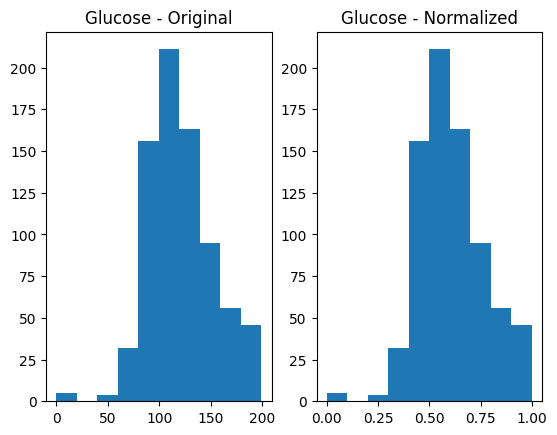

In [ ]:
# Histogram of Glucose (before and after normalization)
scaler = MinMaxScaler()
glucose_norm = scaler.fit_transform(df[['Glucose']])

plt.subplot(1,2,1)
plt.hist(df['Glucose'])
plt.title("Glucose - Original")

plt.subplot(1,2,2)
plt.hist(glucose_norm)
plt.title("Glucose - Normalized")

plt.show()

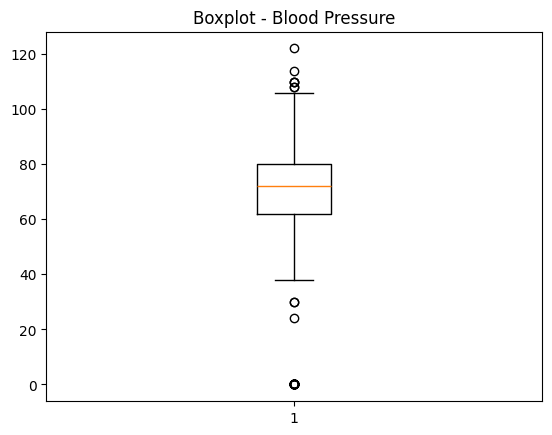

In [ ]:
# Boxplot of Blood Pressure
plt.boxplot(df['BloodPressure'])
plt.title("Boxplot - Blood Pressure")
plt.show()

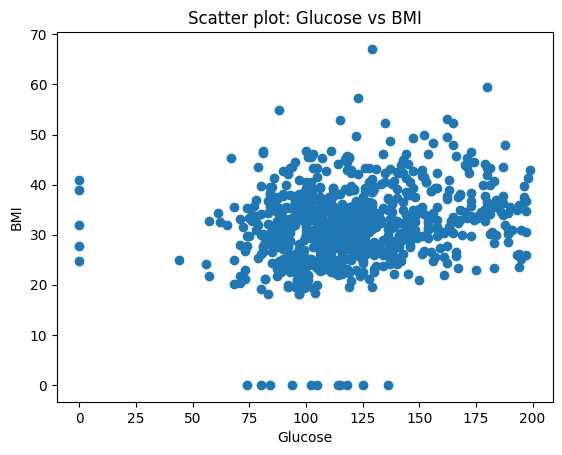

In [ ]:
# Scatter plot Glucose vs BMI
plt.scatter(df['Glucose'], df['BMI'])
plt.title("Scatter plot: Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

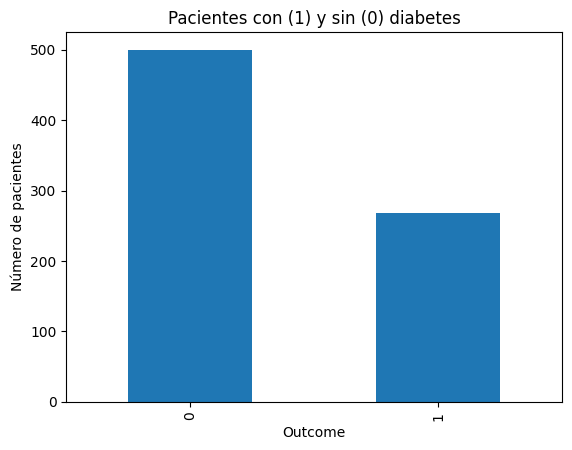

In [ ]:
# Bar chart Outcome
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Pacientes con (1) y sin (0) diabetes")
plt.xlabel("Outcome")
plt.ylabel("Número de pacientes")
plt.show()

# Part 4: Answer the following questions

### *1. What impact do missing values have on data analysis?*

Handling missing values is essential to ensure the quality and reliability of data analysis. If not properly addressed, missing values can distort statistical results, bias machine learning models, and lead to incorrect interpretations. For example, keeping zero values in attributes like Glucose or BloodPressure may underestimate the mean, alter the variance, and affect correlations between variables.  
Replacing missing values with representative statistics such as the median helps maintain data integrity without removing important records, preserving both the sample size and its representativeness.


### *2. How can we detect and handle outliers in medical datasets?*

Outliers can be detected visually using boxplots, histograms, or scatter plots, and statistically using methods such as the interquartile range (IQR) or standard deviation.  
In medical datasets, outliers may indicate either measurement errors or unusual clinical conditions. Therefore, handling them requires caution. Some outliers should be corrected or removed if they are clear errors, while others may be kept if they reflect real patient variability.  
In this project, we used boxplots to identify extreme values in variables such as BloodPressure, helping us evaluate whether to take action or simply document them as natural variation.


### *3. What are some common causes of incorrect data in biomedical studies?*

Incorrect data in biomedical studies can originate from various sources, including:

- *Manual data entry or transcription errors*, especially in paper-based systems.
- *Failures in medical devices or sensors*, leading to anomalous or missing readings.
- *Default values used improperly*, such as zeros being entered instead of actual missing data (NaN).
- *Inconsistent measurement protocols*, such as recording glucose at different times or with different methods.
- *Data encoding issues* in outdated or poorly structured databases.

These issues can severely impact diagnostic accuracy and predictive performance, making data cleaning a critical step in any biomedical analysis.

### *4. How does normalizing data improve the performance of Machine Learning models?*

Normalizing data ensures that all features are on the same scale, preventing attributes with larger numerical ranges from dominating the learning process. This leads to faster convergence, more stable training, and improved accuracy of Machine Learning models, especially those based on distance metrics or gradient descent.

### *5. Why is visualizing data an important step before applying Machine Learning models?*

Data visualization helps identify patterns, trends, and anomalies that may not be obvious in raw data. By understanding the distribution and relationships between features, engineers can select appropriate preprocessing steps and models, reducing the risk of biased or inaccurate results.

### *6. Why is preprocessing critical when working with medical datasets?*

Medical datasets often contain missing values, noise, or inconsistent formats. Preprocessing ensures data quality by cleaning, normalizing, and handling outliers, which is essential for reliable predictions. Accurate preprocessing directly impacts patient safety and the trustworthiness of AI-based medical tools.

### *7. What ethical concerns should be considered when handling patient data?*

Ethical concerns include protecting patient privacy, ensuring informed consent, preventing data misuse, and complying with regulations such as HIPAA or GDPR. Additionally, fairness must be addressed to avoid biases that could harm vulnerable populations or lead to unequal healthcare outcomes.